<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/reg_vs_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
#df.drop(df.columns[df.columns.str.contains('WPI',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('WQC',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [4]:
df=df.dropna()

In [5]:
Data=df
#get some information about our Data-Set
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(15)
memory usage: 60.6 KB


,count,mean,std,min,25%,50%,75%,max
pH,485.0,7.808880,0.411552,5.100000,7.550000,7.860000,8.100000,8.570000
DO,485.0,7.436784,1.106868,4.200000,6.700000,7.400000,8.100000,13.500000
TDS,485.0,115.889278,47.332843,56.000000,84.000000,102.000000,129.000000,308.000000
Alkalinity,485.0,62.251546,20.104135,8.000000,50.000000,56.000000,72.000000,170.000000
EC,485.0,196.757361,81.181745,98.000000,140.000000,171.100000,220.000000,502.000000
Na,485.0,8.911093,5.730719,2.190000,5.290000,7.100000,10.240000,48.350000
Ca,485.0,43.756701,17.846411,14.000000,32.000000,40.000000,52.000000,146.000000
Mg,485.0,24.387629,10.829170,2.000000,16.000000,22.000000,28.000000,84.000000
K,485.0,3.042495,2.306840,0.500000,1.770000,2.420000,3.400000,18.020000
F,485.0,0.512101,0.495054,0.059000,0.249000,0.312000,0.466000,3.060000


In [6]:
Data.dropna()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [7]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


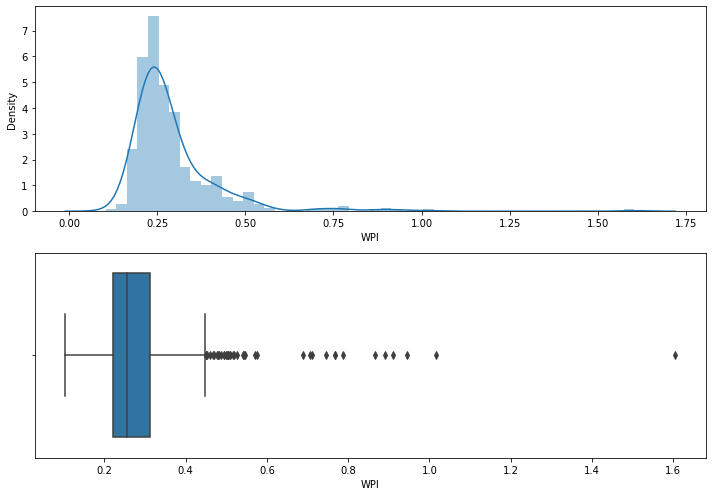

In [8]:
#visualizing WPI
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['WPI'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['WPI'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

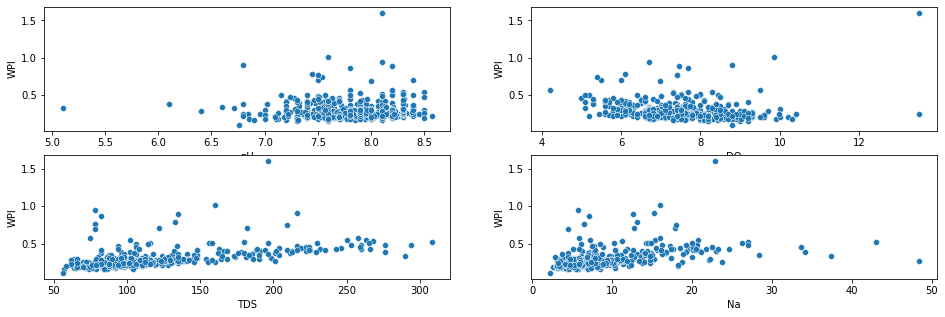

In [9]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['pH'], Data['WPI'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['DO'],Data['WPI'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['TDS'],Data['WPI'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['Na'],Data['WPI'])

In [10]:
Data.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [11]:
X = Data.drop('WPI',axis =1).values
y = Data['WPI'].values

In [12]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [14]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('WPI',axis =1).columns, columns=['Coefficient']) 
coeff_df

0.2846885945904373
[ 2.06476299e-02 -7.86139065e-03  6.60092128e-03  7.19075650e-03
  7.10723835e-03  2.05204108e-03  1.65595057e-02  1.47451495e-17
  1.47581343e-03  2.29269325e-02  2.62664012e-03  2.74453277e-03
  4.25579655e-03  8.55664900e-02]


,Coefficient
pH,2.064763e-02
DO,-7.861391e-03
TDS,6.600921e-03
Alkalinity,7.190757e-03
EC,7.107238e-03
Na,2.052041e-03
Ca,1.655951e-02
Mg,1.474515e-17
K,1.475813e-03
F,2.292693e-02


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


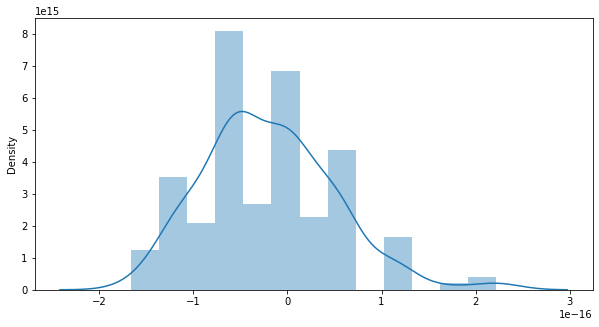

In [15]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [16]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 5.637312562925872e-17
MSE: 5.1629277266927393e-33
RMSE: 7.185351575735693e-17
VarScore: 1.0


In [17]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,0.378558,0.378558
1,0.206298,0.206298
2,0.202799,0.202799
3,0.287420,0.287420
4,0.230100,0.230100
5,0.225151,0.225151
6,0.394453,0.394453
7,0.258585,0.258585
8,0.298194,0.298194
9,0.252657,0.252657


In [18]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
# having 14 neuron is based on the number of available features
model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
3/3 [==============================] - 1s 89ms/step - loss: 0.1370 - val_loss: 0.0717
Epoch 2/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0885 - val_loss: 0.0528
Epoch 3/400
3/3 [==============================] - 0s 12ms/step - loss: 0.0630 - val_loss: 0.0441
Epoch 4/400
3/3 [==============================] - 0s 11ms/step - loss: 0.0523 - val_loss: 0.0380
Epoch 5/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0396 - val_loss: 0.0330
Epoch 6/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0332 - val_loss: 0.0287
Epoch 7/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0278 - val_loss: 0.0252
Epoch 8/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0237 - val_loss: 0.0230
Epoch 9/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0207 - val_loss: 0.0217
Epoch 10/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0181 - val_loss: 0.0206
Epoch 11/400
3/3 [=

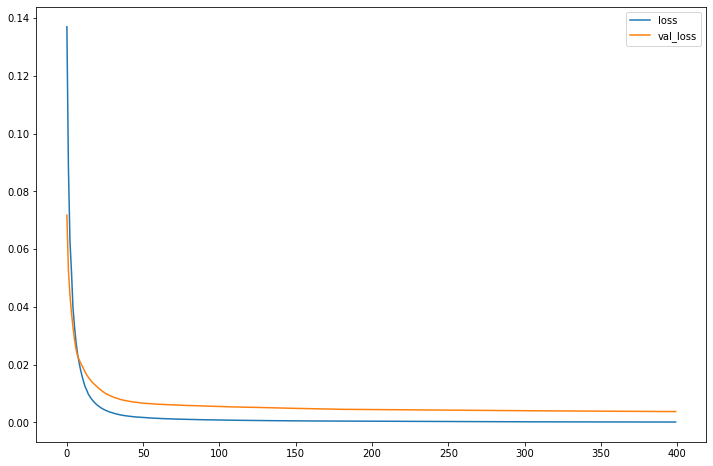

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 0.030008056706162273
MSE: 0.0037688927310395794
RMSE: 0.06139130826949023
VarScore: 0.8736492675456371


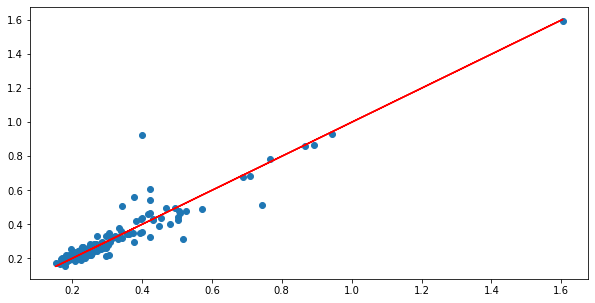

In [22]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


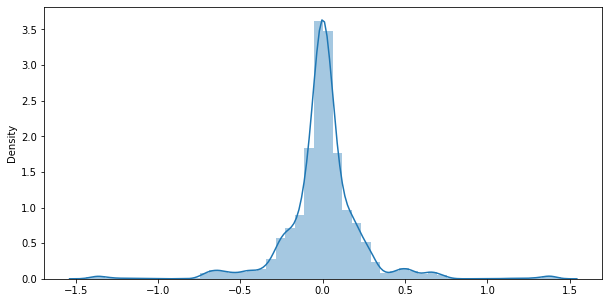

In [23]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)